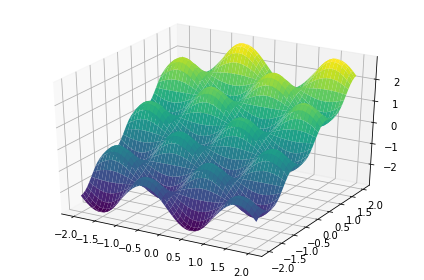

In [1]:
from sympy import pprint, Symbol, symbols, sin, exp, cos, sqrt, series
from sympy.plotting import plot3d
import copy
x, y = symbols('x y')
plot3d(sin(3*x)*cos(5*y)+y, (x, -2, 2), (y, -2, 2))

In [3]:
from typing import List
class Term:
    def __init__(self, subTerm: List['Term'], parent: 'Term' = None) -> None:
        self.parent = parent
        pass
    
    def printNode(self) -> str:
        return ''
    
    def getSubNodes(self) -> List['Term']:
        pass
    
    def getParent(self) -> 'Term':
        return self.parent
    
class Addition(Term):
    def __init__(self, parent: Term) -> None:
        self.parent = parent
        self.left = None
        self.right = None
        
    def setSubNodes(self, subTerms: List[Term]) -> None:
        if len(subTerms) != 2:
            raise Exception("Expected two sub nodes for addition")
        self.left = subTerms[0]
        self.right = subTerms[1]
    
    def printNode(self) -> str:
        return '( ' + str(self.left.printNode()) + ' + ' + str(self.right.printNode()) + ' )'
    
    def getSubNodes(self) -> List[Term]:
        return [self.left, self.right]
    
class Subtraction(Term):
    def __init__(self, parent: Term) -> None:
        self.parent = parent
        self.left = None
        self.right = None
    
    def setSubNodes(self, subTerms: List[Term]) -> None:
        if len(subTerms) != 2:
            raise Exception("Expected two sub nodes for addition")
        self.left = subTerms[0]
        self.right = subTerms[1]
    
    def printNode(self) -> str:
        return '( ' + str(self.left.printNode()) + ' - ' + str(self.right.printNode()) + ' )'
    
    def getSubNodes(self) -> List[Term]:
        return [self.left, self.right]
    
class Multiplication(Term):
    def __init__(self, parent: Term) -> None:
        self.parent = parent
        self.left = None
        self.right = None
    
    def setSubNodes(self, subTerms: List[Term]) -> None:
        if len(subTerms) != 2:
            raise Exception("Expected two sub nodes for addition")
        self.left = subTerms[0]
        self.right = subTerms[1]
    
    def printNode(self) -> str:
        return str(self.left.printNode()) + ' * ' + str(self.right.printNode())
    
    def getSubNodes(self) -> List[Term]:
        return [self.left, self.right]   
    
class Division(Term):
    def __init__(self, parent: Term) -> None:
        self.parent = parent
        self.left = None
        self.right = None
    
    def setSubNodes(self, subTerms: List[Term]) -> None:
        if len(subTerms) != 2:
            raise Exception("Expected two sub nodes for addition")
        self.left = subTerms[0]
        self.right = subTerms[1]
           
    def printNode(self) -> str:
        return str(self.left.printNode()) + ' / ' + str(self.right.printNode())
    
    def getSubNodes(self) -> List[Term]:
        return [self.left, self.right]
    
class Variable(Term):
    def __init__(self, parent: Term, var: str = None) -> None:
        self.var = var
        self.parent = parent
        
    def printNode(self) -> str:
        return 'nDef' if self.var is None else self.var
    
    def initTerm(term: 'Variable', variableNames: List[str]) -> None:
        if isinstance(term, Variable):
            if term.var is None:
                term.var = variableNames[random.randint(0,len(variableNames) - 1)]
                
class Ephemeral(Term):
    def __init__(self, parent: Term, value: float = 0) -> None:
        self.value = value
        self.parent = parent
        
    def printNode(self) -> str:
        return ''+str(self.value)
    
    def initTerm(term: 'Ephemeral', minE: float, maxE: float) -> None:
        if isinstance(term, Ephemeral):
            if term.value == 0:
                term.value = random.uniform(minE, maxE)
                
functionSet = {Addition:2, Subtraction:2, Division:2, Multiplication:2}
terminalSet = {Ephemeral:0, Variable:0}

In [5]:
import random
from typing import Dict, Type

def growTree(parentNode: Term, depth: int, maxDepth: int, functionSet: Dict[Type, int],\
            terminalSet: Dict[Type, int]) -> Term:
    
    #Recursion abort by taking a terminal term
    if depth >= maxDepth:
        rand = random.randint(0,len(terminalSet)-1)
        node = list(terminalSet.keys())[rand](parentNode)
        return node
    
    #select, which type of node to add to the tree
    nodeType, nbSubnodes = selectNodeType(functionSet, terminalSet)
    if nbSubnodes == 0:
        node = nodeType(parentNode)
        return node
    
    #here, we have a non-terminal node, so we need to generate child nodes / terms
    node = nodeType(parentNode)
    subnodes = []
    for i in range(nbSubnodes):
        subnodes.append(growTree(node, depth+1, maxDepth, functionSet, terminalSet))
    node.setSubNodes(subnodes)
    return node
    
def selectNodeType(functionSet: Dict[Type, int], terminalSet: Dict[Type, int]) -> Term:
    '''
    Selects a random type for a node in the tree. 
    Returns the type of the node and the number of subNodes the type expects
    '''
    rand = random.randint(0,len(terminalSet) + len(functionSet) - 1)
    
    #select which type of node to add to the tree 
    if rand < len(terminalSet):
        return list(terminalSet.keys())[rand], 0 #return terminal node
    
    rand -= len(terminalSet)
    nodeType = list(functionSet.keys())[rand]
    return nodeType, functionSet[nodeType]

def initTree(node: Term, variables: List[str], minEph: float, maxEph: float) -> Term:
    if isinstance(node, Variable):
        Variable.initTerm(node, variables)
    elif isinstance(node, Ephemeral):
        Ephemeral.initTerm(node, minEph, maxEph)
    else: #non-terminal node -> recursion required -> DFS
        for subnode in node.getSubNodes():
            initTree(subnode, variables, minEph, maxEph)
    return node

In [18]:
exampleTree = growTree(None, 0, 3, functionSet, terminalSet)
exampleTree = initTree(exampleTree, ['x', 'y'], -5, 5)
exampleTree.printNode()

'y / y / x / ( ( y + -2.265186585756256 ) + -3.4853946464889884 )'

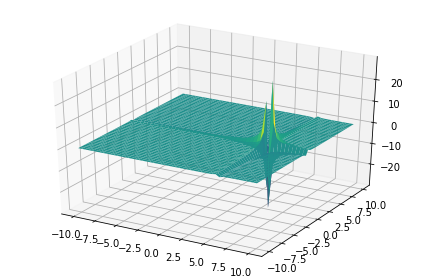

In [19]:
from sympy.parsing.sympy_parser import parse_expr
expr = parse_expr(exampleTree.printNode())
if expr.is_Number:
    print("Scalar expression:")
    print(expr)
else:
    x = symbols('x y')
    plot3d(expr)

In [61]:
def generateRandomTrees(nbTree: int, nbInstantiations: int) -> List[Term]:
    trees = [growTree(None, 0, 5, functionSet, terminalSet) for _ in range(nbTree)]
    trees = [[initTree(tree, ["x1","x2"], -10,10) for tree in trees] for _ in range(nbInstantiations)]
    trees = [tree for subtree in trees for tree in subtree if not parse_expr(tree.printNode()).is_Number]
    while len(trees) != nbTree * nbInstantiations:
        tree = growTree(None, 0, 5, functionSet, terminalSet)
        tree = initTree(tree, ["x1","x2"], -10,10)
        if not parse_expr(tree.printNode()).is_Number:
            trees.append(tree)
    return trees
all_trees = generateRandomTrees(20,5)

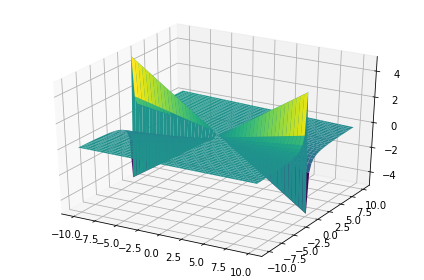

In [66]:
x1, x2 = symbols("x1 x2")
plot3d(parse_expr(all_trees[4].printNode()))

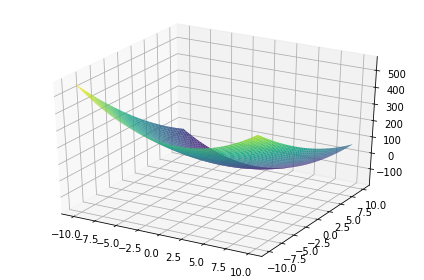

In [79]:
plot3d(parse_expr("15 + x1 * x1 * 0.5 - 25 * x1 + 0.5 * x1 * x2 + 2 * x2 * x2"))
true_expr = parse_expr("15 + x1 * x1 * 0.5 - 25 * x1 + 0.5 * x1 * x2 + 2 * x2 * x2")

In [133]:
def true_function(x1: float, x2: float) -> float:
    return 15 + x1 * x1 * 0.5 - 25 * x1 + 0.5 * x1 * x2 + 2 * x2 * x2

import numpy as np
x1_values = x2_values = np.array(np.linspace(-40,40,5000))
correctValues = [true_function(x1_values[i], x2_values[i]) for i in range(len(x1_values))]

In [134]:
def fitnessError(tree: Term) -> float:
    global x1, x2, x1_values, x2_values, correctValues
    try :
        f = lambdify((x1, x2), parse_expr(tree.printNode()), "numpy")
        results = f(x1_values, x2_values)
        error = np.absolute(np.subtract(correctValues,results))**2
    except KeyError:
        error = float("inf")#sys.maxint
    return np.sum(error), np.mean(error)

def fitnessErrorWithModelComplexity(tree: Term, weight: float = 1) -> float:
    global x1, x2, x1_values, x2_values, correctValues
    count = countNodes(tree)
    try :
        f = lambdify((x1, x2), parse_expr(tree.printNode()), "numpy")
        results = f(x1_values, x2_values)
        error = np.absolute(np.subtract(correctValues,results))**2
    except KeyError:
        error = float("inf")#sys.maxint
    return np.sum(error) * weight + (1-weight) * count, np.mean(error)* weight + (1-weight) * count

In [92]:
from sympy import *
all_trees = generateRandomTrees(20, 5)
best_tree = None
best_tree_score = None
for i in range(len(all_trees)):
    try:
        _, score = fitnessError(all_trees[i])
        if best_tree is None or score < best_tree_score:
            best_tree = all_trees[i]
            best_tree_score = score
    except ValueError:
        continue
best_tree_score
parse_expr(best_tree.printNode())

0.54048896699790706*x1**2 + x1 - 3.131758121646548

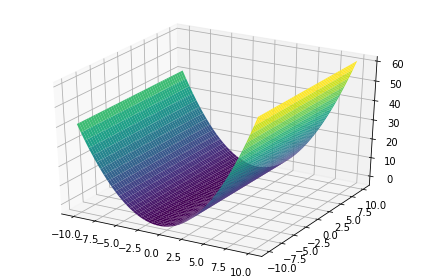

367.83522724833483


In [93]:
plot3d(parse_expr(best_tree.printNode()))
print(best_tree_score)

In [129]:
def hill_climbing(solution: Term, time_out: int =100) -> Term:
    abort = False
    _, errorS = fitnessError(solution)
    while(abort != True):
        #R, ephemerals = tweakEphemerals(copy.deepcopy(solution), ephemerals=ephemerals)
        R = tweakEphemerals(copy.deepcopy(solution))
        _, erroR = fitnessErrorWithModelComplexity(R,weight=0.8)
        if (erroR < errorS):
            solution = R
            errorS = erroR
        time_out = time_out - 1
        if (time_out == 0):
            abort = True
    return solution, errorS

def tweakEphemerals(node: Term, probability: float = 0.3, minEph: int = -30,\
                    maxEph: int = 30, variance: float = 3.0) -> Term:
    if isinstance(node, Ephemeral):
        p = random.random()
        if probability >= p:
            node.value += np.random.normal(0, variance)
        return node
    elif isinstance(node, Variable):
        return node
    
    for n in node.getSubNodes():
        tweakEphemerals(n, probability, minEph, maxEph, variance)
    return node

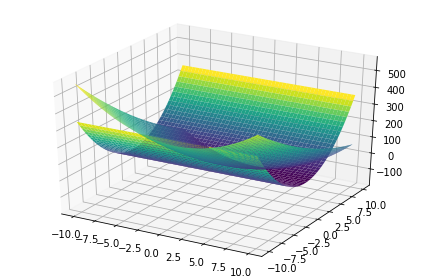

262.6592735924606


In [94]:
#test hill climbing
best_tree, best_tree_score = hill_climbing(best_tree)
plot3d(parse_expr(best_tree.printNode()), true_expr)
print(best_tree_score)

In [95]:
from typing import Dict
def mutateTree(node: Term, functionSet: Dict[Type, int], terminalSet: Dict[Type, int],\
               probability: float =0.1) -> Term:
    '''
    As mutation, we change the type of a node
    Four cases: 
    (a) terminal -> terminal: init terminal (initTree function)
    (b) non-terminal -> terminal: init terminal (initTree function)
    (c) terminal -> non-terminal: generate sub nodes (growTree + initTree function)
    (d) non-terminal -> non-terminal: transfer sub nodes -> continue downwards
    
    Two cases for non-mutation
    (1) terminal ->  return
    (2) non-terminal -> recurse
    '''
    
    p = random.random()
    if probability >= p: #change node type -> mutate
        nodeType, nbSubnodes = selectNodeType(functionSet, terminalSet)
        parent = node.getParent()
        if nbSubnodes == 0: #(a) and (b)
            newNode = nodeType(parent)
            initTree(newNode, ["x1", "x2"], -20, 20)
            return newNode
        
        if isinstance(node, Variable) or isinstance(node, Ephemeral): #(c)
            newNode = nodeType(parent)
            subnodes = []
            for _ in range(nbSubnodes):
                subnodes.append(growTree(newNode,0, 2, functionSet, terminalSet))
            newNode.setSubNodes(subnodes)
            initTree(newNode, ["x1", "x2"], -20, 20)
            return newNode
        
        #(d)
        newNode = nodeType(parent)
        newNode.setSubNodes(node.getSubNodes())
        node = newNode
        
    if isinstance(node, Variable) or isinstance(node, Ephemeral): #(1)
        return node
    
    #(2)
    newSubNodes = []
    for n in node.getSubNodes(): 
        newSubNodes.append(mutateTree(n, functionSet, terminalSet, probability))
    node.setSubNodes(newSubNodes)
    return node
        

262.6592735924606
3.458460692319704*x1**2 + x1 + 8.078215665521017
x1 - 89.647178203318302*x1/(x1 + 17.889685570464792) + 8.078215665521017
before hill climbing: 638.478128477448
after hill climbing: 189.05179911438893


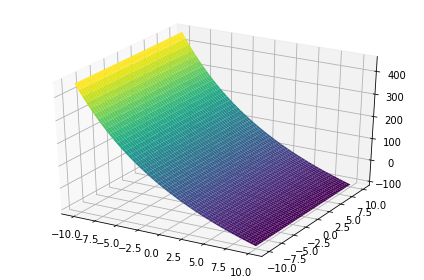

In [107]:
#testing tree mutation
print(best_tree_score)
print(parse_expr(best_tree.printNode()))
tree_test = mutateTree(copy.deepcopy(best_tree), functionSet, terminalSet, probability=0.05)
print(parse_expr(tree_test.printNode()))
_, score = fitnessError(tree_test)
print("before hill climbing: " + str(score))
tree_test, score = hill_climbing(tree_test)
print("after hill climbing: " + str(score))
plot3d(parse_expr(tree_test.printNode()))


In [109]:
from typing import Tuple
def crossoverTree(tree1: Term, tree2: Term) -> Tuple[Term, Term]:
    nbNodes1 = countNodes(tree1)
    nbNodes2 = countNodes(tree2)
    threshold1 = random.randint(0,nbNodes1)
    threshold2 = random.randint(0,nbNodes2)
    pick1, _ = pickNode(tree1, threshold1, 0)
    pick2, _ = pickNode(tree2, threshold2, 0)
    parent1 = pick1.getParent()
    pick1 = pick2.getParent()
    pick2 = parent1
    return tree1, tree2

def countNodes(node: Term) -> int:
    count = 1
    if isinstance(node, Variable) or isinstance(node, Ephemeral):
        return count
    for n in node.getSubNodes():
        count += countNodes(n)
    return count

def pickNode(node: Term, threshold, count) -> Term:
    count += 1
    if count >= threshold:
        return node, count
    if isinstance(node, Variable) or isinstance(node, Ephemeral):
        return None, count
    for n in node.getSubNodes():
        pick, countNew = pickNode(n, threshold, count)
        if pick is not None:
            return pick, count
        else:
            count += countNew
    return None, count

In [119]:
from typing import Callable, Tuple, Dict
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm
import pdb

def genetic_algorithm(P: List[Term], selectProcedure: Callable, crossoverProcedure: Callable, \
                      mutationProcedure: Callable, functionSet: Dict[str, Term],\
                      terminalSet: Dict[str, Term],iterations=100,\
                      minFitness=0)-> Tuple[Term, float, int, List[float], List[Term], List[float]]:
    #Logging statistics
    bestHistory = []
    allInviduals = []
    avgFitnessGenerations = []
    num_cores = multiprocessing.cpu_count()
    popsize = len(P)
    #Init variables for algorithm
    best = None
    bestFitness = None
    generation = 1
    
    while generation <= iterations:
        allFittness = [] #delete old fitness values
        avgFitness = 0 #for statistics
        inputs = tqdm(P)
        data = Parallel(n_jobs=num_cores)(delayed(hill_climbing)(i) for i in inputs)
        data = [i for i in data if i[1] != float("inf")] #filter out solutions with infinite error
        data.sort(key=lambda pair: pair[1]) #sort by error ascending
        P, allFittness = map(list, zip(*data))
        if best == None or allFittness[0] < bestFitness:
            best = P[0]
            bestFitness = allFittness[0]#fitness
            bestHistory.append(bestFitness)
            print("Fitness update: " + str(allFittness[0]) + " in generation " + str(generation))
            print(parse_expr(best.printNode()))
            
        print("Generation: " + str(generation))
        avgFitnessGenerations.append(np.mean(allFittness))
        
        Q = P[0:int(len(P)*0.2)] #elitism
        P = P[int(len(P)*0.8):]
        allFittness = allFittness[int(len(P)*0.8):]
        P = breed(P, allFittness, selectProcedure, crossoverProcedure,\
                  mutationProcedure, functionSet, terminalSet)
        P = P + Q
        missingSolutions = int(max(popsize-len(P) / 2, 2))
        P = P + generateRandomTrees(missingSolutions,2) # produce some fresh trees
        generation += 1
    best, bestFitness = hill_climbing(best, 200)
    return best, bestFitness, generation-1, bestHistory, allInviduals, avgFitnessGenerations

def breed(P: List[Term], F: List[float], selProc: Callable, crosProc: Callable,\
          mutProc: Callable, functionSet: Dict[str, Term], \
          terminalSet: Dict[str, Term]) -> List[Term]:
    Q = []
    for _ in range(int(len(P)/2)):
        parentA = None
        while parentA is None:
            parentA = selProc(P, F)
        parentA = copy.deepcopy(parentA)
        parentB = None
        while parentB is None:
            parentB = selProc(P, F)
        parentB = copy.deepcopy(parentB)
        childA, childB = crosProc(parentA, parentB)
        Q.append(mutProc(childA, functionSet, terminalSet))
        Q.append(mutProc(childB, functionSet, terminalSet))
    return Q

def selectTournament(P: List[Term], F:List[float], tournamentSize:int=3) -> Term:
    individualIndex = random.randint(0, len(P)-1)
    for i in range(tournamentSize):
        tempIndex = random.randint(0, len(P)-1)
        if (F[individualIndex] > F[tempIndex]):
            individualIndex = tempIndex
    return P[individualIndex]

In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def printStatistics(best, fit, gens, history, allI, avgF, numberIterations):
    print("Best found: ", best)
    print("Fitness of best individual: ", fit)
    print("Required number of iterations: ", gens)
    print("History of fitness changes: ", history)
    print("History of avergage fitness: ", avgF)

    fig,ax = plt.subplots(1,1)
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.xlim(0, numberIterations)
    plt.plot(range(numberIterations), avgF, 'r')
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  8.16it/s]


Fitness update: 371.7439526652174 in generation 1
-22.293846379594515*x1 - ((-x1 + x2)*(x2 + 0.06603209168986957) - 3.0389591877104287)*(x2**2 - x2 - 7.5279739353220236) + 24.278856575541587
Generation: 1


  0%|                                                                                           | 0/79 [00:00<?, ?it/s]

Fitness update: 289.4929263510298 in generation 2
-21.838963623446981*x1 - ((-x1 + x2)*(x2 + 0.06603209168986957) - 3.0389591877104287)*(x2**2 - x2 - 9.5072718915372355) + 23.126379959239508
Generation: 2


  0%|                                                                                           | 0/79 [00:00<?, ?it/s]

Fitness update: 52.50985787501723 in generation 3
-12.382516736319465*x1 + x2*(3.0015342928142684*x2 - 13.942165344256258) + x2 + 14.74566781207346 + 0.45296242468065405/x1
Generation: 3


  0%|                                                                                           | 0/80 [00:00<?, ?it/s]

Fitness update: 9.778683374939241 in generation 4
-12.009168925358964*x1 + x2*(3.0015342928142684*x2 - 13.942165344256258) + x2 + 12.447695408549788 - 0.15406980826572319/x1
Generation: 4


  0%|                                                                                           | 0/80 [00:00<?, ?it/s]

Fitness update: 4.973354218674052 in generation 5
-12.009168925358964*x1 + x2*(3.0015342928142684*x2 - 13.942165344256258) + x2 + 12.447695408549788 - 0.15406980826572319/x1
Generation: 5


  0%|                                                                                           | 0/80 [00:00<?, ?it/s]

Generation: 6


  0%|                                                                                           | 0/79 [00:00<?, ?it/s]

Generation: 7


  0%|                                                                                           | 0/79 [00:00<?, ?it/s]

Generation: 8


  0%|                                                                                           | 0/79 [00:00<?, ?it/s]

Generation: 9


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:08<00:00,  9.80it/s]


Generation: 10
Best found:  <joblib.externals.cloudpickle.cloudpickle.Addition object at 0x000002A4F6C5E448>
Fitness of best individual:  4.973354218674052
Required number of iterations:  10
History of fitness changes:  [371.7439526652174, 289.4929263510298, 52.50985787501723, 9.778683374939241, 4.973354218674052]
History of avergage fitness:  [3209100.9157093815, 694789972.3620056, 26868937.085465945, 22343026.129387055, 8524457.480548, 2643569.06388734, nan, 2866287.1033220515, 2775606.9821878574, 203791456240.58286]


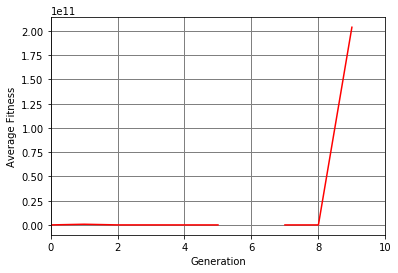

In [135]:
import warnings
warnings.filterwarnings("ignore")
np.seterr(all='warn')

numberIterations = 10
maxTreeDepth = 5
P = generateRandomTrees(20, 2)
best, fit, gens, history, allI, avgF = genetic_algorithm(P, selectTournament, crossoverTree, mutateTree, functionSet, terminalSet, iterations=numberIterations)
printStatistics(best, fit, gens, history, allI, avgF, numberIterations)

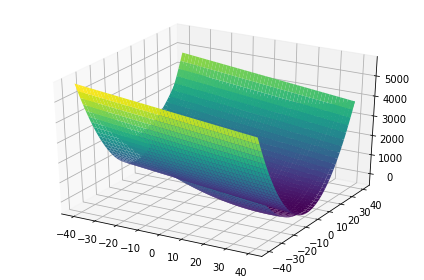

In [137]:
ex = parse_expr(best.printNode())
plot3d(ex, true_expr, (x1,-40,40),(x2,-40,40))

In [138]:
ex

-12.009168925358964*x1 + x2*(3.0015342928142684*x2 - 13.942165344256258) + x2 + 12.447695408549788 - 0.15406980826572319/x1

In [128]:
true_expr

0.5*x1**2 + 0.5*x1*x2 - 25*x1 + 2*x2**2 + 15